In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x1 = np.array([1, 4, 5, 8, 10])
x2 = np.array([1, 4, 7, 8, 11])
y = np.array([3, 9, 11, 17, 21])

[]

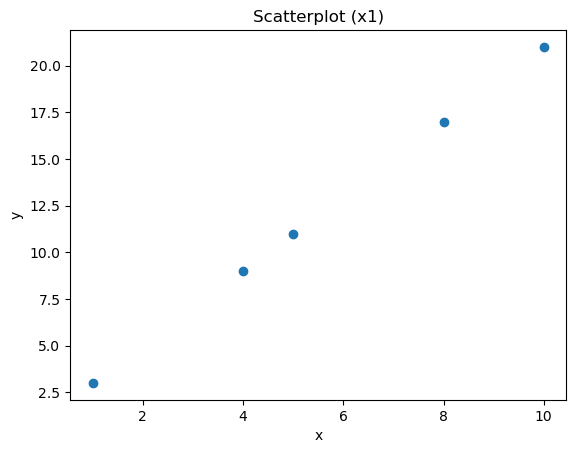

In [3]:
plt.title("Scatterplot (x1)")
plt.scatter(x1, y)
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

[]

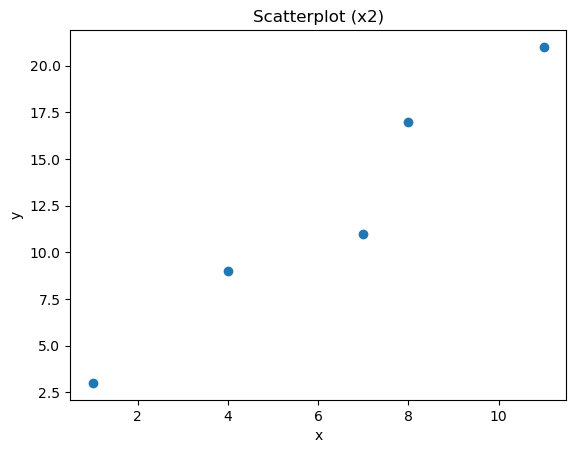

In [4]:
plt.title("Scatterplot (x2)")
plt.scatter(x2, y)
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

In [5]:
z = np.polyfit(x2, y, 4)

In [6]:
p = np.poly1d(z)

In [7]:
_x = np.linspace(0, 10, 200)

[]

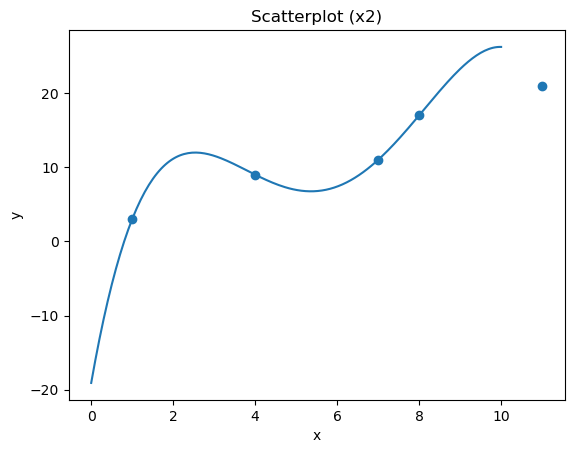

In [8]:
plt.title("Scatterplot (x2)")
plt.scatter(x2, y)
plt.plot(_x, p(_x))
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

### 3

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
import seaborn as sns

In [10]:
iris = datasets.load_iris()

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
df['class'] = iris.target

In [13]:
# df['class'] = df['class'].apply(lambda x : iris.target_names[x])

In [14]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
69,5.6,2.5,3.9,1.1,1
2,4.7,3.2,1.3,0.2,0
16,5.4,3.9,1.3,0.4,0


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

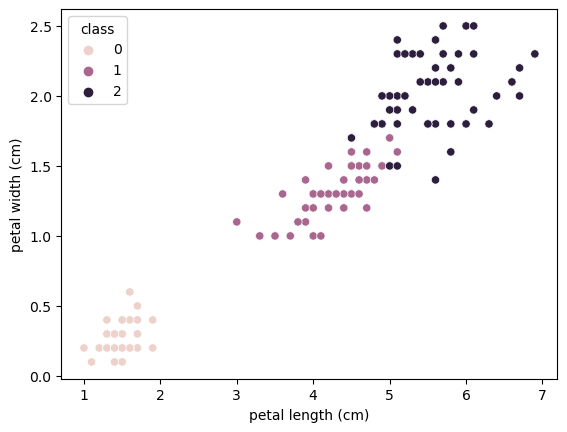

In [15]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='class')

[]

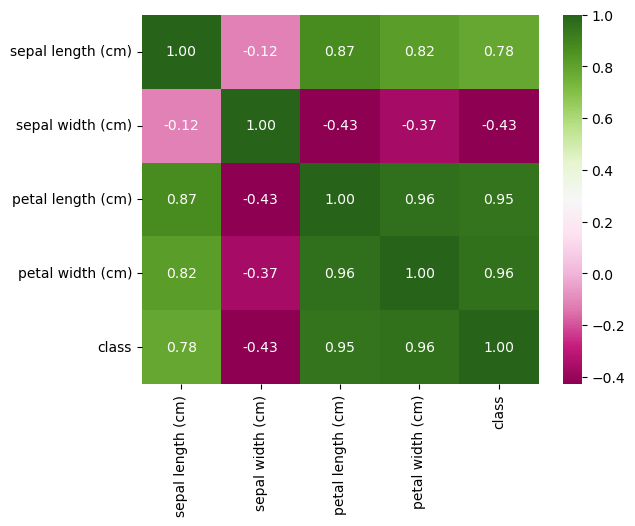

In [16]:
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap='PiYG'
)

plt.plot()

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

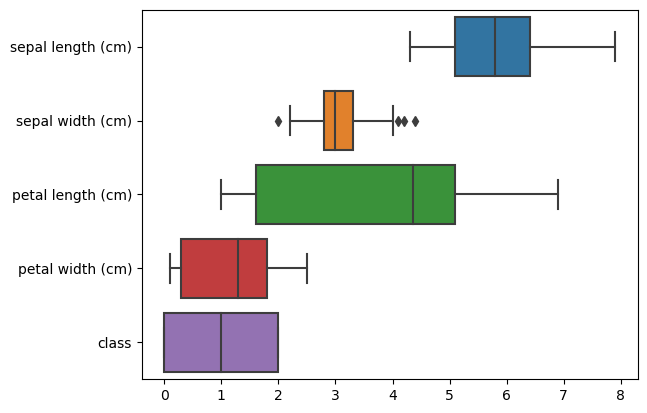

In [18]:
sns.boxplot(data=df, orient='h')

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
scaling = StandardScaler()
scaled_df = scaling.fit_transform(df.iloc[:, :-1])

In [22]:
scaled_df.shape

(150, 4)

In [23]:
clusters = KMeans(n_clusters=3, random_state=0, n_init="auto").fit_predict(scaled_df)

In [24]:
pca=PCA(n_components=3)
pca_df = pca.fit_transform(df.iloc[:, :-1])

In [25]:
pca_df.shape

(150, 3)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


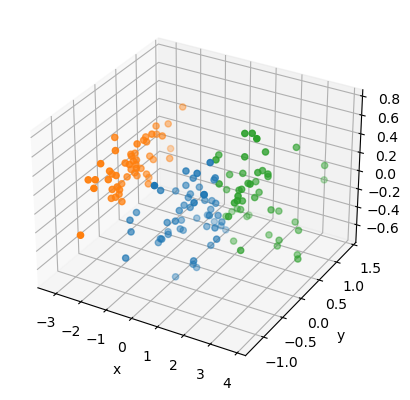

In [34]:
axes = plt.axes(projection="3d")

print(type(axes))

axes.scatter3D(pca_df.T[0][clusters == 0], pca_df.T[1][clusters == 0], pca_df.T[2][clusters == 0])
axes.scatter3D(pca_df.T[0][clusters == 1], pca_df.T[1][clusters == 1], pca_df.T[2][clusters == 1])
axes.scatter3D(pca_df.T[0][clusters == 2], pca_df.T[1][clusters == 2], pca_df.T[2][clusters == 2])

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plt.show()